<a href="https://colab.research.google.com/github/elolive/elolive/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

In [0]:

from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt


In [102]:
X = []
Y = []

for i in range(6):
  lst = list(range(i, i+4))
  print(lst)
  X.append(list(map(lambda c: [c/10], lst)))
  Y.append((i + 4) / 10) 

X = np.array(X)
Y = np.array(Y)

for i in range(len(X)):
  print(X[i],'\n\n', Y[i])


[0, 1, 2, 3]
[1, 2, 3, 4]
[2, 3, 4, 5]
[3, 4, 5, 6]
[4, 5, 6, 7]
[5, 6, 7, 8]
[[0. ]
 [0.1]
 [0.2]
 [0.3]] 

 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 

 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 

 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 

 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 

 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 

 0.9


In [103]:
model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units = 10, return_sequences = False, input_shape = (4,1)),
                             tf.keras.layers.Dense(1)
])
model.compile(optimizer = 'adam', loss = 'mse')

history = model.fit(X, Y, epochs = 100)

Train on 6 samples
Epoch 1/100
6/6 [==============================] - 1s 126ms/sample - loss: 0.4564
Epoch 2/100
6/6 [==============================] - 0s 1ms/sample - loss: 0.4427
Epoch 3/100
6/6 [==============================] - 0s 1ms/sample - loss: 0.4291
Epoch 4/100
6/6 [==============================] - 0s 2ms/sample - loss: 0.4158
Epoch 5/100
6/6 [==============================] - 0s 1ms/sample - loss: 0.4026
Epoch 6/100
6/6 [==============================] - 0s 992us/sample - loss: 0.3897
Epoch 7/100
6/6 [==============================] - 0s 1ms/sample - loss: 0.3769
Epoch 8/100
6/6 [==============================] - 0s 1ms/sample - loss: 0.3643
Epoch 9/100
6/6 [==============================] - 0s 1ms/sample - loss: 0.3520
Epoch 10/100
6/6 [==============================] - 0s 1ms/sample - loss: 0.3398
Epoch 11/100
6/6 [==============================] - 0s 1ms/sample - loss: 0.3278
Epoch 12/100
6/6 [==============================] - 0s 1ms/sample - loss: 0.3161
Epoch 13/100
6

In [104]:
print(model.predict(X))

[[0.45392495]
 [0.5450329 ]
 [0.6279408 ]
 [0.7018855 ]
 [0.76685655]
 [0.8234055 ]]


In [0]:
#LSTM start

In [106]:
X = []
Y = []

for i in range(1000):
  lst = np.random.rand(100) # 0 ~ 1 사이 숫자 100개 point
  
  idx = np.random.choice(100, 2, replace = False)

  zeros = np.zeros(100)
  zeros[idx] = 1 #선택된 2개만 1로 check 마치 원핫인코딩

  X.append(np.array(list(zip(zeros, lst))))
  Y.append(np.prod(lst[idx])) #곱한값 return

check = np.array(X)
print(check.shape)



(1000, 100, 2)


In [107]:
x = np.random.rand(10)
print(x)

[0.01577315 0.05932565 0.74211931 0.51502426 0.53966076 0.63917844
 0.96808123 0.29440673 0.60447746 0.86403796]


In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units = 30, return_sequences=True, input_shape = (100, 2)),
                             tf.keras.layers.SimpleRNN(units = 30),
                            tf.keras.layers.Dense(1)
])

In [0]:
model.compile(optimizer = 'adam', loss = 'mse')

In [110]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs = 20, validation_split = 0.2)


Train on 800 samples, validate on 200 samples
Epoch 1/20
800/800 [==============================] - 4s 5ms/sample - loss: 0.0980 - val_loss: 0.0456
Epoch 2/20
800/800 [==============================] - 3s 4ms/sample - loss: 0.0538 - val_loss: 0.0454
Epoch 3/20
800/800 [==============================] - 3s 4ms/sample - loss: 0.0515 - val_loss: 0.0472
Epoch 4/20
800/800 [==============================] - 3s 4ms/sample - loss: 0.0500 - val_loss: 0.0464
Epoch 5/20
800/800 [==============================] - 3s 4ms/sample - loss: 0.0492 - val_loss: 0.0435
Epoch 6/20
800/800 [==============================] - 3s 4ms/sample - loss: 0.0505 - val_loss: 0.0462
Epoch 7/20
800/800 [==============================] - 3s 4ms/sample - loss: 0.0492 - val_loss: 0.0458
Epoch 8/20
800/800 [==============================] - 3s 4ms/sample - loss: 0.0500 - val_loss: 0.0463
Epoch 9/20
800/800 [==============================] - 3s 4ms/sample - loss: 0.0493 - val_loss: 0.0445
Epoch 10/20
800/800 [===============

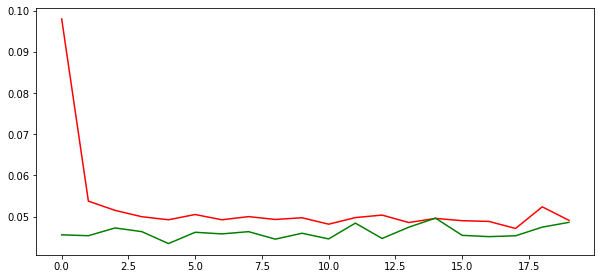

In [111]:
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'], 'r', label = 'loss')
plt.plot(history.history['val_loss'], 'g', label = 'loss')

In [113]:
model.evaluate()
prediction = model.predict(X[:5])

ValueError: ignored

In [114]:
prediction = model.predict(X[2560:2565])

for i in range:
  print(Y[2560 + i]))
  print(prediction[i][0])
  print(Y[2560 + i] - prediction[i][0])

SyntaxError: ignored

In [115]:
X = []
Y = []
for i in range(3000):
    # 0~1 사이의 랜덤한 숫자 100 개를 만듭니다.
    lst = np.random.rand(100)
    # 마킹할 숫자 2개의 인덱스를 뽑습니다.
    idx = np.random.choice(100, 2, replace=False)
    # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다.
    zeros = np.zeros(100)
    zeros[idx] = 1
    # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X 에 저장합니다.
    X.append(np.array(list(zip(zeros, lst))))
    # 마킹 인덱스가 1인 값들만 서로 곱해서 Y 에 저장합니다.
    Y.append(np.prod(lst[idx]))
    
print(X[0], Y[0])

[[0.         0.23818951]
 [0.         0.23447949]
 [0.         0.29544301]
 [1.         0.13126978]
 [0.         0.04676747]
 [0.         0.82672534]
 [0.         0.9705069 ]
 [0.         0.13850143]
 [0.         0.13907527]
 [0.         0.86922044]
 [0.         0.83287262]
 [0.         0.50139162]
 [0.         0.53525281]
 [0.         0.45613463]
 [0.         0.02518816]
 [0.         0.68622177]
 [0.         0.28819589]
 [0.         0.34756009]
 [0.         0.3956368 ]
 [0.         0.15390009]
 [0.         0.06792185]
 [0.         0.71744473]
 [0.         0.43435265]
 [0.         0.77657796]
 [0.         0.14491877]
 [0.         0.82424459]
 [0.         0.6372652 ]
 [0.         0.39666668]
 [0.         0.95594042]
 [0.         0.0541874 ]
 [0.         0.67359054]
 [0.         0.08800102]
 [0.         0.22147702]
 [0.         0.96807234]
 [0.         0.30194646]
 [0.         0.05013991]
 [0.         0.64841762]
 [0.         0.12231512]
 [0.         0.98229392]
 [0.         0.16254276]


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

In [0]:
X = np.array(X)
Y = np.array(Y)
# 2560개의 데이터만 학습시킵니다. validation 데이터는 20% 로 지정합니다.
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [0]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))

print(prediction[1])
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

In [0]:
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')

In [0]:
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

In [0]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding = 'utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding = 'utf-8')

In [119]:
print('length of text: {} characters'.format(len(train_text)))

length of text: 6937271 characters


In [120]:
print(train_text[:500])

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의 긴장감을 제대로 살려내지못했다.	0
9443947	별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네	0
7156791	액션이 없는데도 재미 있는 몇안되는 영화	1
5912145	왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져


In [0]:
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

In [122]:
x = "this is it"
y = (x.split(" "))
print(x.count(' '))

2


In [125]:
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])
    print(len(sentences[i]))

['아', '더빙', '진짜', '짜증나네요', '목소리']
5
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
6
['너무재밓었다그래서보는것을추천한다']
1
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
7
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']
13


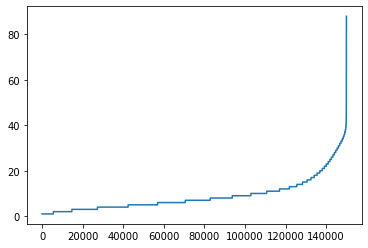

In [127]:
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
#print(sentence_len)
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

In [128]:
print(sum([int(l < 25) for l in sentence_len]))

141836


In [130]:
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [133]:
tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding= 'post')

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [140]:
print(tokenizer.index_word[6])
print(tokenizer.index_word[20000])




너무
잊혀질


In [142]:
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])
print(temp)

[[], [19999], [], [106]]


In [143]:
temp = pad_sequences(temp, padding = 'post')
print(temp)

[[    0]
 [19999]
 [    0]
 [  106]]
